In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Advertising.csv')

In [2]:
df.drop(columns=['Radio', 'Newspaper'], inplace=True)

$\theta_{0, 1} = (X^{T} X)^{-1}X^{T}y$

$\theta_{0, 1} = A \times B$

In [3]:
m = df['Sales'].values.size
m

200

$y = \theta_{0} + x\theta_{1}$

In [5]:
x = np.append(np.ones((m, 1)), df['TV'].values.reshape(m, 1), axis = 1)

In [8]:
y = df['Sales'].values.reshape(m, 1)

In [12]:
A = np.linalg.inv(np.dot(x.transpose(), x))

In [13]:
B = np.dot(x.transpose(), y)

theta = np.dot(A, B)
theta

array([[6.97482149],
       [0.05546477]])

In [14]:
def predict(tv_ads):
    x = np.array([1, tv_ads]).reshape(1, 2)
    y_pred = np.dot(x, theta)
    
    return y_pred[0, 0]

In [15]:
predict(400)

29.160729676053343

c:\users\rohman\documents\pyenvironment\test-py.3.7.9-all-packages\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


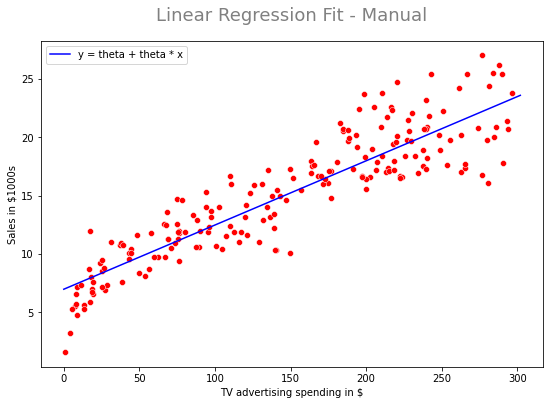

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax, color='red')

# Create random data based on theta and x value
a = np.round(theta, 3)
x_value = np.array(range(0, 303))
# theta + theta * x
y_value = a[0, 0] + (a[1, 0] * x_value)


sns.lineplot(x_value, y_value, ax=ax, label='y = theta + theta * x', color='blue')

ax.set_title('Linear Regression Fit - Manual', pad=20, size=18, color='gray')
ax.set_xlabel('TV advertising spending in $')
ax.set_ylabel('Sales in $1000s')
ax.legend(loc='upper left')
plt.savefig('img_output/normal_eq_linear_regression_fit.png')